### Exploratory Data Analysis on Air Quality Dataset

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Continuous | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [133]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [134]:
plt.rcParams['text.color'] = '#000'

In [135]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [136]:
# Remove some unnecessary columns
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1)
df.shape

(9471, 15)

In [137]:
# To combine Date and Time column and set to index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')
df.set_index('Datetime',inplace=True)

# Remove the Date Time since we already have a new index column, Datetime
df = df.drop(['Date','Time'], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1.0+ MB


In [138]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [139]:
#Replace , with . since some of the values have wrong formats.
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [140]:
# Observe null (NaN) values
df.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In this dataset, there are 114 values that are either zero or negative values ( there are a lot of *-200 values* when I checked the raw data). So, we need to manipulate those negative values to ensure a good correlation analysis.

In [141]:
# Observing Null Values and dropping feature with large rows of null values
for col in df.columns: 
    df[col] = df[col].replace(-200,np.nan)   # replace -200 to NaN
    print(col,':',df[col].isna().sum()/len(df)) 
    if df[col][:int(len(df)*0.8)].isna().sum()/int(len(df)*0.8) > 0.5: 
        df.drop(col, axis=1, inplace=True)
    else:
        df[col]: df[col].interpolate(method='linear',limit_direction='both')

CO(GT) : 0.18973709217611656
PT08.S1(CO) : 0.05068102629078239
NMHC(GT) : 0.9034948791046352
C6H6(GT) : 0.05068102629078239
PT08.S2(NMHC) : 0.05068102629078239
NOx(GT) : 0.18509133143279485
PT08.S3(NOx) : 0.05068102629078239
NO2(GT) : 0.18540808784711224
PT08.S4(NO2) : 0.05068102629078239
PT08.S5(O3) : 0.05068102629078239
T : 0.05068102629078239
RH : 0.05068102629078239
AH : 0.05068102629078239


<p style="text-align:justify;">NMHC(GT) column was dropped based on the interpolation since it has a large volumes of outlier that can affect the model. I set the condition of handling null values that if ever there are more than 50% of the first 80% of the dataset (which can represent the train dataset) are classified to be a missing value, we should disregard those feature variable.</p>

In [142]:
# Handling NaN values
df.ffill(inplace=True)

<p style="text-align:justify;">In this part, all values were grouped first based on the Datetime followed by obtaining the mean of those non-null values to replace those NaN values in their group.</p>

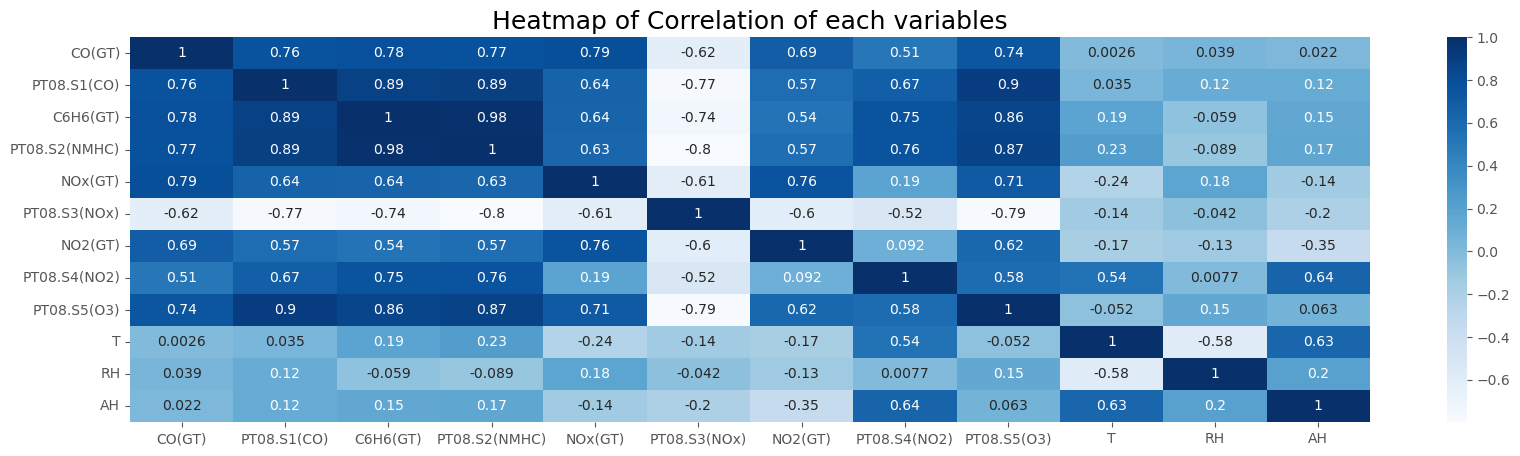

In [143]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',ax=ax)
plt.title('Heatmap of Correlation of each variables',fontsize=18)
plt.show()

<p style="text-align:justify;">Based on this correlation heatmap, we can observe that the CO/C6H6 ratio between Dew Point and AH were higly correlated to each other. We may confirm it by building a scatter plot.</p>

In [144]:

def create_features(df):
    feat_df = df.copy()
    feat_df['NO2/NOx'] = feat_df['NO2(GT)']/feat_df['NOx(GT)']
    feat_df['Dew_Point'] = feat_df['T'] - ((100-feat_df['RH'])/5)
    return feat_df

df = create_features(df).drop(['NO2(GT)','NOx(GT)','T','RH'],axis=1)

In [145]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),AH,NO2/NOx,Dew_Point
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,0.7578,0.680723,3.38
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,1174.0,1559.0,972.0,0.7255,0.893204,2.84
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,1140.0,1555.0,1074.0,0.7502,0.870229,2.70
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,1092.0,1584.0,1203.0,0.7867,0.709302,3.00
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,1205.0,1490.0,1110.0,0.7888,0.885496,3.12


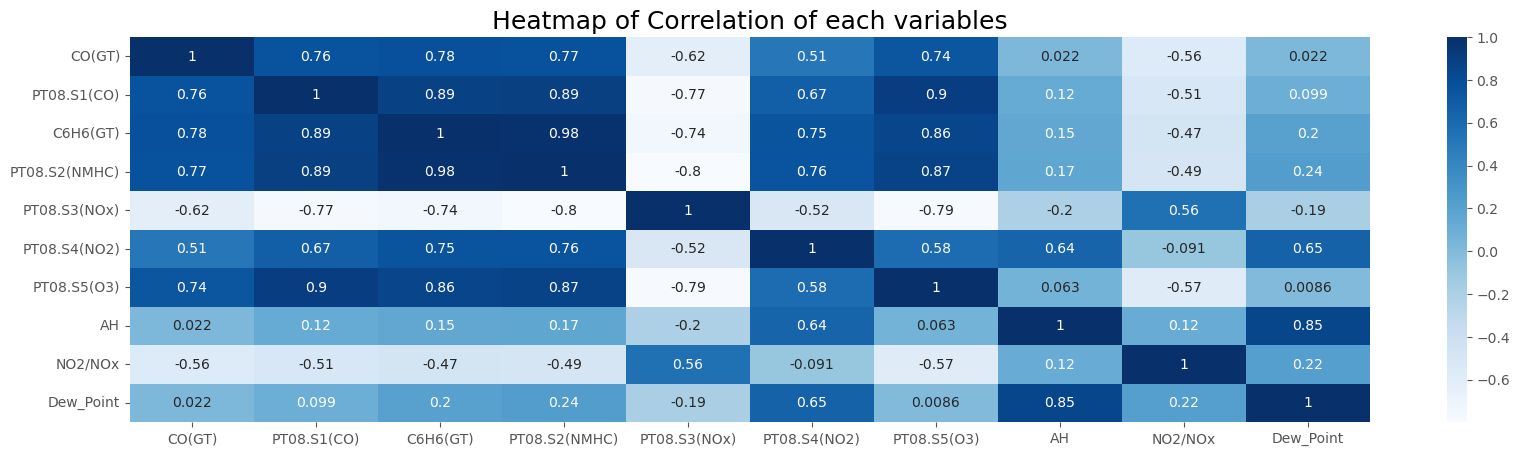

In [146]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',ax=ax)
plt.title('Heatmap of Correlation of each variables',fontsize=18)
plt.show()

Feature and Target Variable Creation

The goal

In [147]:
new_df = df.copy()
X = new_df.drop(['C6H6(GT)'],axis=1)
y = new_df['C6H6(GT)']

Data Train/Test Split

In [148]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [149]:

reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [150]:
y_pred=reg.predict(X_test)
y_pred

array([28.34489251,  6.50175857,  9.44936124, ..., 17.78785379,
        5.2366946 , 16.99328697])

In [151]:
# Check accuracy
print(r2_score(y_test,y_pred))

0.9745700270618044


In [152]:
y_pred = pd.Series(y_pred, name='Predicted C6H6')

actual_and_pred = pd.concat([y_test.reset_index(drop=True),y_pred],axis=1)
actual_and_pred.rename(columns={'C6H6(GT)':'Actual C6H6'},inplace=True)
actual_and_pred.set_index(y_test.index,inplace=True)
actual_and_pred

,Actual C6H6,Predicted C6H6
Datetime,,
2004-12-13 16:00:00,30.1,28.344893
2005-03-31 09:00:00,6.8,6.501759
2005-02-21 18:00:00,8.8,9.449361
2005-02-06 09:00:00,2.0,0.897573
2004-12-21 21:00:00,13.8,15.731561
...,...,...
2004-05-26 20:00:00,20.3,20.979358
2004-04-08 14:00:00,13.9,15.039843
2005-01-18 08:00:00,16.8,17.787854


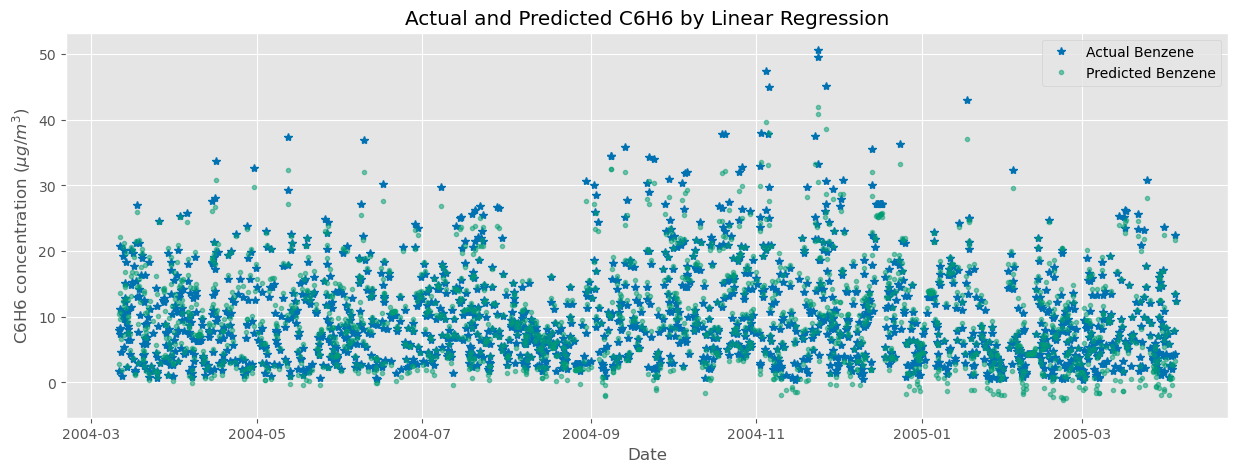

In [156]:
plt.figure(figsize=(15,5))
plt.plot(actual_and_pred.index,actual_and_pred['Actual C6H6'],label='Actual Benzene',linestyle='',\
    marker='*',color='#0072B2')
plt.plot(actual_and_pred.index,actual_and_pred['Predicted C6H6'],label='Predicted Benzene',linestyle='',\
    marker='.',color='#009E73',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('C6H6 concentration ($\mu g/m^3$)')
plt.title('Actual and Predicted C6H6 by Linear Regression')
plt.legend()
plt.show()

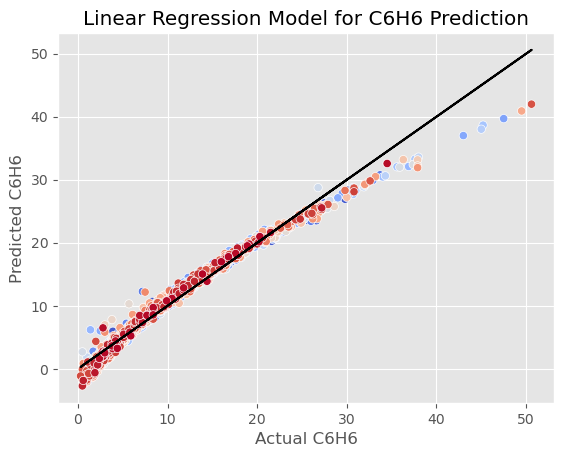

Model Intercept: -25.09481676530709
Mean Squared Error: 1.4097484621421148
R-squared (Coefficient of Determination): 0.9745700270618044


In [160]:
sns.scatterplot(actual_and_pred,x='Actual C6H6',y='Predicted C6H6',hue=actual_and_pred.index,\
    palette='coolwarm',legend=False)
plt.plot(actual_and_pred['Actual C6H6'],actual_and_pred['Actual C6H6'],color='black', linestyle='-')
plt.title('Linear Regression Model for C6H6 Prediction')
plt.show()

# Model Evaluation: Some metrics to learn about the model
print("Model Intercept:", reg.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared (Coefficient of Determination):", r2_score(y_test, y_pred))

<p style="text-align:justify;">As observed each feature may have different trends but the meteorological parameters (AH and Dew Point) are possible candidates as feature variables. Meanwhile, for regression analysis we can provide separate models wherein the target variable are those air pollutant ratios.</p>